<a href="https://colab.research.google.com/github/iynnn/Data-Science/blob/main/Gamma%20Fest%202023/Percobaan_Ke_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Connect ke Drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount = True)


Mounted at /content/drive


In [ ]:
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
path =  "/content/drive/MyDrive/[02] Lomba/[Current] GAMMAFEST IPB 2023 /Penyisihan"
train = pd.read_csv(path + "/train.csv")
test = pd.read_csv(path + "/test.csv")

FileNotFoundError: ignored

In [ ]:
print(train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35973 entries, 0 to 35972
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      35973 non-null  int64  
 1   DC024   35973 non-null  int64  
 2   DC025   35973 non-null  int64  
 3   DC205   35962 non-null  float64
 4   DC206   35952 non-null  float64
 5   DC207   35929 non-null  float64
 6   DC208   35960 non-null  float64
 7   DC209   35955 non-null  float64
 8   DC210   35932 non-null  float64
 9   DC211   35949 non-null  float64
 10  DC212   35949 non-null  float64
 11  DC213   35896 non-null  float64
 12  DC214   35964 non-null  float64
 13  DC215   35959 non-null  float64
 14  DC216   35934 non-null  float64
 15  DC217   35973 non-null  int64  
 16  DC219   35973 non-null  int64  
 17  DC220   35969 non-null  float64
 18  DC226   35967 non-null  float64
 19  DC230a  35962 non-null  float64
 20  DC230b  32964 non-null  float64
 21  DC232   32949 non-null  float64
 22

ini data dari data training udah luamayan bagus, maksudnya semuanya udah float atau integer, paling di apa ya null nya gitu

jangan lupa misal nanti bisa dicek apakah itu dalam suatu variabel udah memenuhi range yangudah tepat apa engga, misal kan kalo mau yes no, cuma nol dan satu gitu aja kan, nah itu apakah ada nilai 2 nya apa ginmana


tapi kayanya sekarang ini remove na aja ga si wkwkwkw

In [ ]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11990 entries, 0 to 11989
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      11990 non-null  int64
 1   DC024   11990 non-null  int64
 2   DC025   11990 non-null  int64
 3   DC205   11990 non-null  int64
 4   DC206   11990 non-null  int64
 5   DC207   11990 non-null  int64
 6   DC208   11990 non-null  int64
 7   DC209   11990 non-null  int64
 8   DC210   11990 non-null  int64
 9   DC211   11990 non-null  int64
 10  DC212   11990 non-null  int64
 11  DC213   11990 non-null  int64
 12  DC214   11990 non-null  int64
 13  DC215   11990 non-null  int64
 14  DC216   11990 non-null  int64
 15  DC217   11990 non-null  int64
 16  DC219   11990 non-null  int64
 17  DC220   11990 non-null  int64
 18  DC226   11990 non-null  int64
 19  DC230a  11990 non-null  int64
 20  DC230b  11990 non-null  int64
 21  DC232   11990 non-null  int64
 22  DC232b  11990 non-null  int64
 23  DC235   119

In [ ]:
pd.set_option('display.max_columns', None)
train.head()

,id,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,DC213,DC214,DC215,DC216,DC217,DC219,DC220,DC226,DC230a,DC230b,DC232,DC232b,DC235,DC237,DC237a,DC237b,DC237c,DC237d,DC237e,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a,DC201
0,1,11,2,16.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,35.0,36.0,31.0,1.0,1,2,80.0,8.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1,12.0,60.0,Layak Minum
1,2,11,2,31.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,35.0,36.0,31.0,2.0,4,1,44.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2,31.0,70.0,Layak Minum
2,3,11,2,12.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,35.0,36.0,31.0,2.0,2,1,35.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,4,11.0,75.0,Layak Minum
3,6,11,2,12.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,35.0,36.0,31.0,3.0,4,1,79.0,8.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN,1.0,0.0,1.0,1,11.0,85.0,Layak Minum
4,7,11,2,12.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,35.0,36.0,31.0,2.0,3,2,37.0,8.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2,11.0,65.0,Layak Minum


In [ ]:
pd.set_option('display.max_columns', None)
test.head()

,id,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,DC213,DC214,DC215,DC216,DC217,DC219,DC220,DC226,DC230a,DC230b,DC232,DC232b,DC235,DC237,DC237a,DC237b,DC237c,DC237d,DC237e,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a
0,26718,35,2,17,1,0,1,0,1,1,0,33,35,33,1,2,1,29,2,1,1,1,0,2,0,0,0,0,0,0,0,1,1,1,1,1,3,21,52
1,26802,35,1,12,1,1,1,1,0,1,0,35,35,33,1,2,1,42,2,1,1,1,0,1,1,1,0,0,0,0,0,1,1,0,0,1,2,11,18
2,41302,74,2,12,1,0,1,1,1,1,0,35,36,31,2,4,1,46,2,1,1,1,0,3,0,0,0,0,0,0,0,1,0,0,1,4,5,11,78
3,38698,72,1,12,1,1,0,0,0,0,1,35,36,31,1,1,1,46,2,1,1,1,0,3,1,1,0,0,0,0,0,1,0,1,0,0,1,11,20
4,44257,76,2,12,1,0,1,0,0,1,0,35,23,31,3,4,1,47,2,1,1,1,0,1,1,1,0,0,0,0,0,1,1,1,1,1,3,11,125


In [ ]:
train.isna().sum()

id            0
DC024         0
DC025         0
DC205        11
DC206        21
DC207        44
DC208        13
DC209        18
DC210        41
DC211        24
DC212        24
DC213        77
DC214         9
DC215        14
DC216        39
DC217         0
DC219         0
DC220         4
DC226         6
DC230a       11
DC230b     3009
DC232      3024
DC232b     3024
DC235     10446
DC237        21
DC237a       37
DC237b       37
DC237c       37
DC237d       37
DC237e       37
DC237f       37
DC241       612
DC242      5374
DC244         4
DC246         9
DC252        14
DC270a        0
DC109        11
DC142a       52
DC201         3
dtype: int64

In [ ]:
test.isna().sum()

id        0
DC024     0
DC025     0
DC205     0
DC206     0
DC207     0
DC208     0
DC209     0
DC210     0
DC211     0
DC212     0
DC213     0
DC214     0
DC215     0
DC216     0
DC217     0
DC219     0
DC220     0
DC226     0
DC230a    0
DC230b    0
DC232     0
DC232b    0
DC235     0
DC237     0
DC237a    0
DC237b    0
DC237c    0
DC237d    0
DC237e    0
DC237f    0
DC241     0
DC242     0
DC244     0
DC246     0
DC252     0
DC270a    0
DC109     0
DC142a    0
dtype: int64

In [ ]:
train_1 = train.drop('DC235', axis = 1)
train_1 = train_1.dropna()
train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27998 entries, 0 to 35972
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      27998 non-null  int64  
 1   DC024   27998 non-null  int64  
 2   DC025   27998 non-null  int64  
 3   DC205   27998 non-null  float64
 4   DC206   27998 non-null  float64
 5   DC207   27998 non-null  float64
 6   DC208   27998 non-null  float64
 7   DC209   27998 non-null  float64
 8   DC210   27998 non-null  float64
 9   DC211   27998 non-null  float64
 10  DC212   27998 non-null  float64
 11  DC213   27998 non-null  float64
 12  DC214   27998 non-null  float64
 13  DC215   27998 non-null  float64
 14  DC216   27998 non-null  float64
 15  DC217   27998 non-null  int64  
 16  DC219   27998 non-null  int64  
 17  DC220   27998 non-null  float64
 18  DC226   27998 non-null  float64
 19  DC230a  27998 non-null  float64
 20  DC230b  27998 non-null  float64
 21  DC232   27998 non-null  float64
 22

anjas, dari 35k jadi 18k
hampir ilang setengahnya sih ini,
lebih baik jangan gegabah buat ngilangin banyak NA, 50% an, terlalu banyak untuk menghilangkan NA


In [ ]:
train_1.describe()

# nah nanti bisa dicek di sini, apakah yang

,id,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,DC213,DC214,DC215,DC216,DC217,DC219,DC220,DC226,DC230a,DC230b,DC232,DC232b,DC237,DC237a,DC237b,DC237c,DC237d,DC237e,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a
count,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.00000,27998.0,27998.000000,27998.00000,27998.00000,27998.000000,27998.000000,27998.000000,27998.000000
mean,23454.878277,41.718051,1.429602,14.405136,0.976748,0.200264,0.892635,0.641832,0.357418,0.802093,0.154332,31.494750,34.317344,31.724052,2.364169,3.046396,1.150296,48.511965,3.334845,1.105043,0.979891,0.942246,0.004857,0.674298,0.656833,0.008643,0.053575,0.019323,0.003500,0.19555,1.0,0.830666,0.34306,0.35549,1.192228,2.924923,14.434924,87.276984
std,13879.939154,23.477734,0.495028,5.442493,0.150704,0.400205,0.309582,0.479471,0.479248,0.398429,0.361274,5.840594,3.781649,2.708769,1.067145,1.128408,0.357368,13.329814,2.338255,0.306615,0.140374,0.233282,0.069527,0.491559,0.497407,0.174847,0.269646,0.202367,0.159657,0.42346,0.0,0.375053,0.47474,0.47867,1.224131,1.421195,8.415427,91.765403
min,1.000000,11.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,12.000000,12.000000,0.000000,1.000000,1.000000,14.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.0,0.000000,0.00000,0.00000,0.000000,1.000000,11.000000,0.000000
25%,11545.250000,21.000000,1.000000,12.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,33.000000,35.000000,31.000000,2.000000,2.000000,1.000000,39.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.0,1.000000,0.00000,0.00000,0.000000,2.000000,11.000000,48.000000
50%,22717.000000,34.000000,1.000000,12.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,33.000000,35.000000,31.000000,2.000000,4.000000,1.000000,48.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.0,1.000000,0.00000,0.00000,1.000000,3.000000,11.000000,70.000000
75%,36129.750000,64.000000,2.000000,12.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,35.000000,35.000000,33.000000,3.000000,4.000000,1.000000,57.000000,5.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.0,1.000000,1.00000,1.00000,1.000000,4.000000,11.000000,100.000000
max,47963.000000,94.000000,2.000000,96.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,96.000000,96.000000,96.000000,20.000000,5.000000,2.000000,98.000000,9.000000,2.000000,1.000000,1.000000,1.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,1.0,1.000000,1.00000,1.00000,4.000000,5.000000,96.000000,998.000000


In [ ]:
# Mapping Data
train_1['DC201'] = train_1['DC201'].map({'Layak Minum' : 1, 'Tidak Layak Minum' : 0})


In [ ]:
train_1.groupby('DC201').count()['id']

DC201
0     2233
1    25765
Name: id, dtype: int64

<Axes: ylabel='count'>

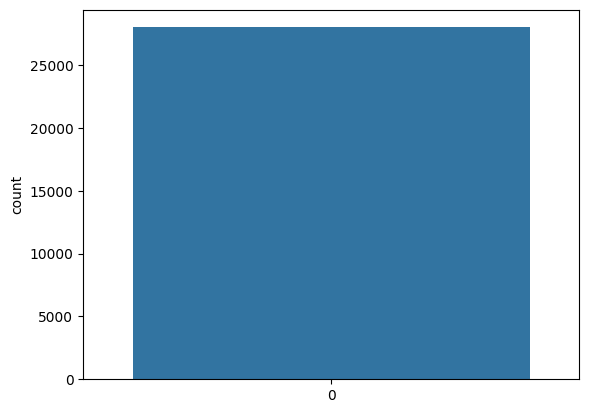

In [ ]:
import seaborn as sns

In [ ]:
t = pd.DataFrame(train_1['DC201'].value_counts())
# print(t)
print(t.index)
print(t)

# sns.barplot(t.index,t)

Int64Index([1, 0], dtype='int64')
   DC201
1  25765
0   2233


In [ ]:
train_1['DC201']

0        1
1        1
2        1
4        1
5        1
        ..
35966    1
35969    1
35970    1
35971    1
35972    1
Name: DC201, Length: 27998, dtype: int64

## Split the Data

In [ ]:
X = train_1.drop('DC201', axis = 1)
Y = train_1['DC201']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print('Jumlah data Training : ', len(X_train), " | Jumlah data konfirm  : ", len(X_test))

Jumlah data Training :  22398  | Jumlah data konfirm  :  5600


In [ ]:
# Sementara dulu gapapa ya brou make ngilangin NA
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

## Predict Konfirm Data
(sumpah ini aku jujur lupa namanya apa, kan ada data training, testing, lagi satu yang buat apa ya, buat nyoba nyoba ngetes model kita gitu lho) wkwkw


In [ ]:
y_pred = rf.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : " , accuracy)

Accuracy :  0.9289285714285714


In [ ]:
ef_wan = f1_score(y_test, y_pred)
print("F1-Score : ", ef_wan)

F1-Score :  0.962551750094091


# Confusion Matrix

KeyboardInterrupt: ignored

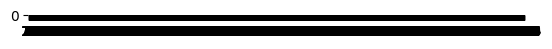

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot = True, square = True, cbar = False, xticklabels = y_test)

# PR
1. coba benerin lagi preprocessingnya (bisa ngeliat NaN, apakah angkanya udah tepat, ngeliat apakah ada duplikat)
2. coba beberapa model yang bisa digunakan untuk clasifikasi
3. jangan lupa coba di tuning parameternya, siapa tau makin bersih
4. coba validasinya banyakin, kita ini butuh validasi eaaa

In [ ]:
test_1 = test.drop('DC235', axis = 1)

In [ ]:
# Bismillah coba submit

prediksi = rf.predict(test_1)


In [ ]:
test_1

In [ ]:
test_1['DC201'] = prediksi
test_1['DC201'] = test_1['DC201'].map({ 1 : 'Layak Minum',  0 : 'Tidak Layak Minum'})

In [ ]:
final_1 = test_1[['id', 'DC201']]
final_1

In [ ]:
final_1.groupby('DC201').count()


In [ ]:
# final_1.to_csv(path + '/hasil.csv', index = False)

## K-Fold

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
scores = cross_validate(rf, X, Y, cv=5,
scoring=('accuracy', 'f1'), return_train_score=True)
predictions = cross_val_predict(rf, X, Y,
cv=5)

skor = pd.DataFrame(scores)
skor

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1
0,2.485729,0.044419,0.084464,1.0,0.010041,1.0
1,2.314339,0.088923,0.909286,1.0,0.952417,1.0
2,2.214985,0.081502,0.920714,1.0,0.958698,1.0
3,2.405295,0.095031,0.886944,1.0,0.939743,1.0
4,2.566692,0.047409,0.094303,1.0,0.031328,1.0


In [ ]:
predik = pd.DataFrame(predictions)
predik

# Coba Preprocessing


In [ ]:
train.info()

In [ ]:
train.isna().sum()

## Provinsi (DC024)

In [ ]:
train['DC024'].unique()

# Neural Network

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

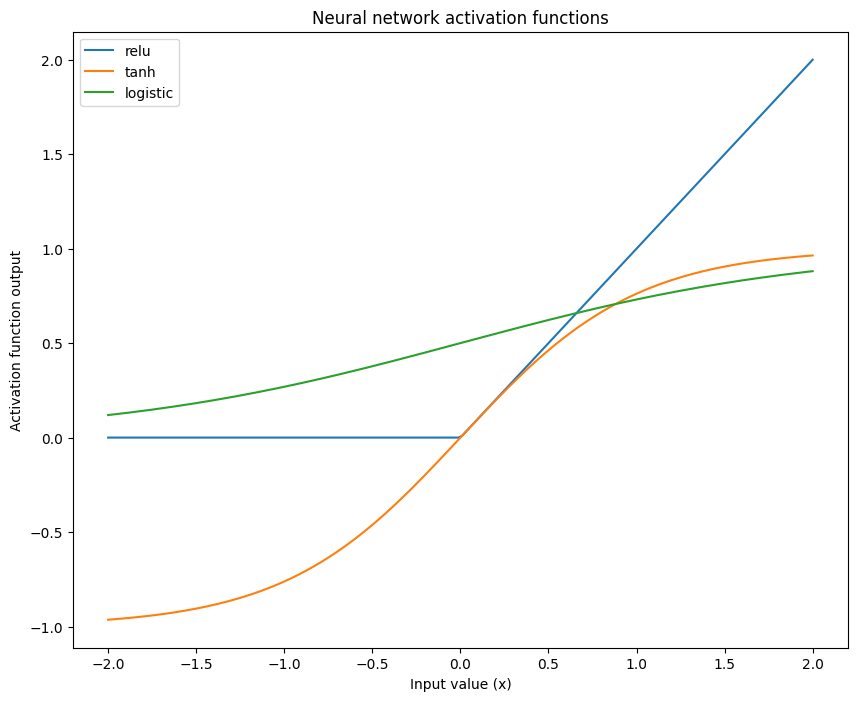

In [ ]:
xrange = np.linspace(-2, 2, 200)

plt.figure(figsize=(10, 8))

plt.plot(xrange, np.maximum(xrange, 0), label = 'relu')
plt.plot(xrange, np.tanh(xrange), label = 'tanh')
plt.plot(xrange, 1 / (1 + np.exp(-xrange)), label = 'logistic')
plt.legend()
plt.title('Neural network activation functions')
plt.xlabel('Input value (x)')
plt.ylabel('Activation function output');

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[0.73034903, 0.62650602, 0.        , ..., 1.        , 0.        ,
        0.09018036],
       [0.17121888, 0.06024096, 0.        , ..., 1.        , 0.        ,
        0.24048096],
       [0.78578875, 0.72289157, 1.        , ..., 1.        , 0.        ,
        0.05410822],
       ...,
       [0.07795755, 0.01204819, 1.        , ..., 0.75      , 0.        ,
        0.08416834],
       [0.59173929, 0.30120482, 0.        , ..., 0.25      , 0.        ,
        0.01202405],
       [0.09384513, 0.01204819, 0.        , ..., 0.25      , 0.23529412,
        0.04509018]])

In [ ]:
layer_size = [16, 8]
activation_function = "relu"

clf = MLPClassifier(hidden_layer_sizes = layer_size, random_state = 0, activation = activation_function, solver = "adam")
clf.fit(X_train_scaled, y_train)
clf.get_params()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': [16, 8],
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

muncul pertanyaan, kenapa kok make layer size segitu nodesnya?
karena di sumber yang dibaca itu kalo bisa setengahnya kan
[sumber 1](https://towardsdatascience.com/17-rules-of-thumb-for-building-a-neural-network-93356f9930af)

In [ ]:
train_1.shape[1]


39

In [ ]:
# for i in range(1000):
#   if i**2 > 6000:
#     if i**2 < 7000:
#       print(i**2)

In [ ]:
print('Breast cancer dataset')
print('Accuracy of NN classifier on training set: {:.5f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.5f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset
Accuracy of NN classifier on training set: 0.93138
Accuracy of NN classifier on test set: 0.92250


In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(8,8))
# sns.heatmap(cm, annot=True, square=True, cbar=False)

# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Accuracy Score: {:.3}'.format(clf.score(X_test_scaled, y_test)));

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
scores = cross_validate(clf, X, Y, cv=10,
scoring=('accuracy', 'f1'), return_train_score=True)
predictions = cross_val_predict(clf, X, Y,
cv=5)

skor = pd.DataFrame(scores)
skor

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1
0,2.853463,0.006500,0.828929,0.886380,0.901945,0.937449
1,2.809036,0.014199,0.786429,0.667077,0.874370,0.784184
2,3.461287,0.006994,0.929286,0.904397,0.962113,0.948612
3,1.861634,0.006444,0.920357,0.920073,0.958527,0.958105
4,1.806599,0.007379,0.922500,0.917652,0.959598,0.956645
5,1.995903,0.005798,0.928929,0.906540,0.962516,0.950016
6,1.197971,0.006053,0.869286,0.866061,0.926741,0.925191
7,3.427494,0.008129,0.920000,0.921660,0.958333,0.959056
8,1.797728,0.007825,0.911397,0.912457,0.953575,0.953454
9,2.606798,0.011051,0.920329,0.921068,0.958512,0.958694


In [ ]:
hasil_nn = clf.predict(test_1.drop('DC201', axis = 1))

len(hasil_nn)

NameError: ignored

In [ ]:
hasil_rf = pd.DataFrame(y_pred)
final_1.value_counts('DC201')

NameError: ignored

In [ ]:
hasil_rf

NameError: ignored

In [ ]:
hasil_nn

NameError: ignored

In [ ]:
test_2 = test_1
test_2['DC201'] = hasil_nn
test_2['DC201'] = test_2['DC201'].map({ 1 : 'Layak Minum',  0 : 'Tidak Layak Minum'})
test_2

In [ ]:
final_nn = test_2[['id', 'DC201']]
final_nn.value_counts('DC201')

In [ ]:
sns.countplot(x = final_nn['DC201'])

In [ ]:
sns.countplot(x = final_1['DC201'])

In [ ]:
final_nn.to_csv(path + '/final_nn.csv', index = False)